In [2]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
import numpy as np

In [3]:
df = pd.read_csv('arg.csv',)
df.head()
len(df)
df

FileNotFoundError: [Errno 2] File b'arg.csv' does not exist: b'arg.csv'

In [3]:

one_val=np.ones(len(df),dtype = int)
one_val

df["attt"] = one_val
df


,concat,sum_bill_no,bill_date,attt
0,SAREE SAREE,BJP/350/414,2019-03-16,1
1,MENS LOWER,RAJ/342/178,2019-03-08,1
2,MENS MIX,BH/337/247,2019-03-03,1
3,MENS TSHIRT,SBN/343/177,2019-03-09,1
4,GIRLS SHORTS,PAN/338/36,2019-03-04,1
...,...,...,...,...
260897,MATCHING LINING,SAC/348/48,2019-03-14,1
260898,MATCHING LINING,SAC/348/52,2019-03-14,1
260899,MATCHING LINING,SAC/348/58,2019-03-14,1
260900,MATCHING POPLIN,SAC/348/59,2019-03-14,1


In [4]:
df1= df.groupby(['sum_bill_no','concat'])['attt'].sum().unstack().reset_index().fillna(0).set_index('sum_bill_no')
# df1.first() 

In [5]:
def en(x):
    if x<=0:
        return 0;
    if x>=1:
        return 1;
bb=df1.applymap(en)
bb
    

concat,ACCESSORIES 4 PCS SPONGE,ACCESSORIES ACCESSORIES,ACCESSORIES AIR BAG,ACCESSORIES ALMIRAH,ACCESSORIES B.STAND,ACCESSORIES BABY BOOT,ACCESSORIES BABY WATCH,ACCESSORIES BACKPACK,ACCESSORIES BAG,ACCESSORIES BALL,...,WOOLLEN INFERNO,WOOLLEN MUFFLER,WOOLLEN SCARF,WOOLLEN SHAWL SET,WOOLLEN SLACKS,WOOLLEN SOCKS,WOOLLEN SUIT,WOOLLEN SWEATER,WOOLLEN SWEATSHIRT,WOOLLEN THERMAL WEAR
sum_bill_no,,,,,,,,,,,,,,,,,,,,,
BAG/335/1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAG/335/10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAG/335/11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAG/335/12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAG/335/13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBPA/365/99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPLI/335/1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPLI/335/2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
ff=apriori(bb,min_support=0.05,use_colnames=True)
rules=association_rules(ff, metric="lift",min_threshold=1)
rules

NameError: name 'apriori' is not defined

In [7]:
ff=rules.nlargest(20, ['lift']) 
ff

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(MENS SHIRT),(MENS JEANS),0.054414,0.035230,0.018824,0.345939,9.819352,0.016907,1.475046
16,(MENS JEANS),(MENS SHIRT),0.035230,0.054414,0.018824,0.534312,9.819352,0.016907,2.030514
4,(MATCHING PC FALL),(MATCHING LINING),0.027393,0.071630,0.014225,0.519294,7.249653,0.012263,1.931263
5,(MATCHING LINING),(MATCHING PC FALL),0.071630,0.027393,0.014225,0.198587,7.249653,0.012263,1.213616
11,(MATCHING PC DUPATTA),(MATCHING PC LEGGINGS),0.048421,0.033487,0.011099,0.229215,6.844817,0.009477,1.253933
10,(MATCHING PC LEGGINGS),(MATCHING PC DUPATTA),0.033487,0.048421,0.011099,0.331430,6.844817,0.009477,1.423307
1,(MATCHING DM),(MATCHING K.B.C),0.086462,0.022164,0.010480,0.121212,5.468936,0.008564,1.112710
0,(MATCHING K.B.C),(MATCHING DM),0.022164,0.086462,0.010480,0.472856,5.468936,0.008564,1.732996
14,(SAREE SAREE),(MATCHING PC PETICOAT),0.170990,0.079322,0.039177,0.229120,2.888492,0.025614,1.194321
15,(MATCHING PC PETICOAT),(SAREE SAREE),0.079322,0.170990,0.039177,0.493904,2.888492,0.025614,1.638049


In [23]:
import random
import seaborn as sns 
import matplotlib.pyplot as plt 

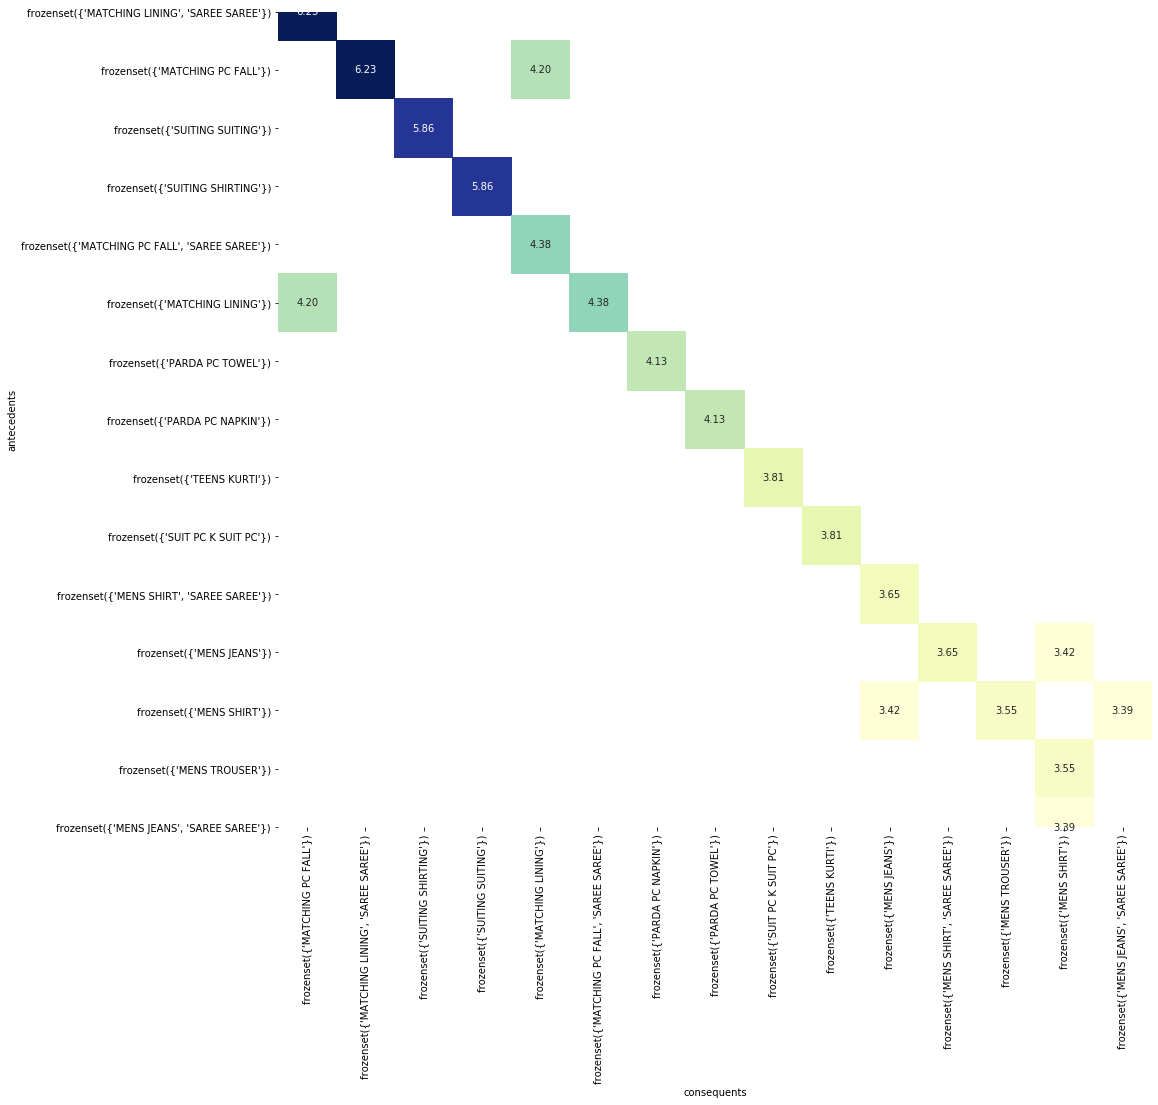

In [24]:
tc1=pd.concat([ff['antecedents'] , ff['consequents'],ff['lift'] ], axis=1, sort=False)
# flights = sns.load_dataset("flights")
flights = tc1.pivot("antecedents", "consequents", "lift")
plt.subplots(figsize=(20,15))
ax = sns.heatmap(flights,cmap="YlGnBu",
                annot=True,
                fmt=".2f",
                annot_kws={'size':10},
                cbar=False,
                square=True,
#                 xticklabels=False,
#                 yticklabels=False,
                
                
                )
# type(rules.lift[0])